In [1]:
# import required modules
import os
import matplotlib.pyplot as plt
import pandas
import geopandas
import csv
import seaborn as sns
%matplotlib inline

In [2]:
# set filepaths
root = '../..'
london_dir = 'data/london_chloropleth/'
shp_fp = os.path.join(root, london_dir, 'statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

# load data
map_df = geopandas.read_file(shp_fp)

# preview data
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


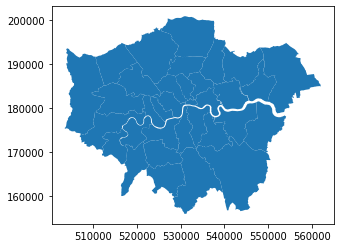

In [3]:
# preview data
map_df.plot()

In [4]:
# function to convert csv to UTF-encoded csv
def convert_csv_to_utf (csv_fp):
    with open(csv_fp, 'r', encoding='utf-8', errors='ignore') as infile, open(csv_fp.replace('.csv', '_final.csv'), 'w') as outfile:
        inputs = csv.reader(infile)
        output = csv.writer(outfile)
        for index, row in enumerate(inputs):
            output.writerow(row)

In [5]:
# load cleaned csv file to join with geodataframe
csv_fp = os.path.join(root, london_dir, 'london-borough-profiles.csv')
convert_csv_to_utf(csv_fp)
new_fp = os.path.join(root, london_dir, 'london-borough-profiles_final.csv')
df = pandas.read_csv(new_fp)

# preview dataframe
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [6]:
# clean and join dataframe

# slice only the columns you need
sliced_df = df[['Area_name', 'Happiness_score_2011-14_(out_of_10)', 'Anxiety_score_2011-14_(out_of_10)', 'Population_density_(per_hectare)_2017', 'Mortality_rate_from_causes_considered_preventable_2012/14']]

# rename columns
col_dict = {'Area_name':'borough', 'Happiness_score_2011-14_(out_of_10)':'happiness', 'Anxiety_score_2011-14_(out_of_10)':'anxiety', 'Population_density_(per_hectare)_2017':'pop_density', 'Mortality_rate_from_causes_considered_preventable_2012/14':'mortality'}
data_for_map = sliced_df.rename(index=str,columns=col_dict)

# preview dataframe
data_for_map.head()

,borough,happiness,anxiety,pop_density,mortality
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


In [7]:
# join cleaned dataframe with geodataframe
merged = map_df.set_index('NAME').join(data_for_map.set_index('borough'))

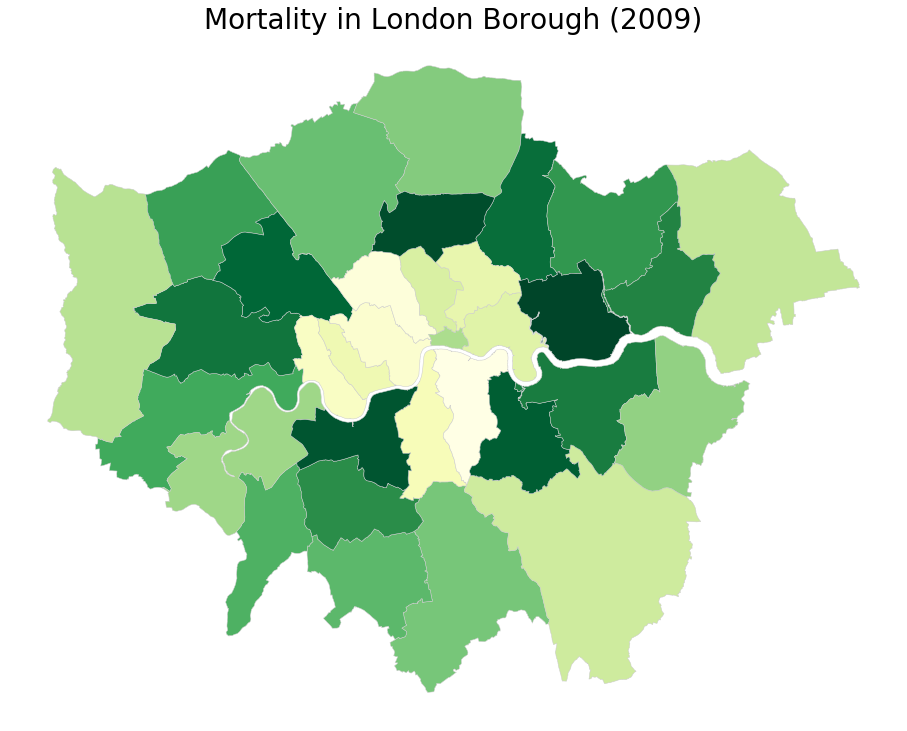

In [14]:
# plot

# 1. create figure with subplot
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,1,1)

# 2. remove ticks
ax.tick_params(bottom=False, left=False, top=False, right=False)

# 3. remove x and y axes labels
ax.xaxis.set_ticklabels('')
ax.yaxis.set_ticklabels('')

# 4. remove borders
for key, spine in ax.spines.items():
    spine.set_visible(False)
    
# 5. add title
ax.set_title('Mortality in London Borough (2009)', fontsize=28)

# 6. add legend

# plot
ax = merged.plot(column='pop_density', cmap='YlGn', linewidth=0.5, ax=ax, edgecolor='0.8')


fig.show()
#map_london_by('mortality')